# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Haikal Haidar Putra
- **Email:** haikalkaka9@gmail.com
- **ID Dicoding:** kalloong

## Menentukan Pertanyaan Bisnis

- How does shipping time affect customer satisfaction?
- What categories get positive reviews?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Data Wrangling

### Gathering Data

In [2]:
customers_df = pd.read_csv("data/customers_dataset.csv", delimiter=",")
geolocation_df = pd.read_csv("data/geolocation_dataset.csv", delimiter=",")
order_items_df = pd.read_csv("data/order_items_dataset.csv", delimiter=",")
order_payments_df = pd.read_csv("data/order_payments_dataset.csv", delimiter=",")
order_reviews_df = pd.read_csv("data/order_reviews_dataset.csv", delimiter=",")
orders_df = pd.read_csv("data/orders_dataset.csv", delimiter=",")
product_category_df = pd.read_csv("data/product_category_name_translation.csv", delimiter=",")
products_df = pd.read_csv("data/products_dataset.csv", delimiter=",")
sellers_df = pd.read_csv("data/sellers_dataset.csv", delimiter=",")

**Insight**
- Read csv data using library pandas to change into dataframe

**Merge DataSet untuk pertanyaan pertama**

In [3]:
orders_reviews_df = pd.merge(orders_df, order_reviews_df, on='order_id', how='inner')
orders_reviews_items_df = pd.merge(orders_reviews_df, order_items_df, on='order_id', how='inner')
shipping_data_df = pd.merge(orders_reviews_items_df, customers_df, on='customer_id', how='inner')

**Merge Dataset untuk pertanyaan Kedua**

In [4]:
products_translated_df = pd.merge(products_df, product_category_df, on='product_category_name', how='left')
product_reviews_df = pd.merge(order_items_df, products_translated_df, on='product_id', how='inner')
product_reviews_df = pd.merge(product_reviews_df, order_reviews_df, on='order_id', how='inner')

### Assessing Data

**Searching missing value and duplicate on dataset**

In [5]:
print("Missing values in shipping data:")
print(shipping_data_df.isnull().sum())

Missing values in shipping data:
order_id                             0
customer_id                          0
order_status                         0
order_purchase_timestamp             0
order_approved_at                   15
order_delivered_carrier_date      1184
order_delivered_customer_date     2360
order_estimated_delivery_date        0
review_id                            0
review_score                         0
review_comment_title             98938
review_comment_message           64730
review_creation_date                 0
review_answer_timestamp              0
order_item_id                        0
product_id                           0
seller_id                            0
shipping_limit_date                  0
price                                0
freight_value                        0
customer_unique_id                   0
customer_zip_code_prefix             0
customer_city                        0
customer_state                       0
dtype: int64


In [6]:
print("Duplicates in shipping data:")
print(shipping_data_df.duplicated().sum())

Duplicates in shipping data:
0


In [7]:
print("\nMissing values in product reviews data:")
print(product_reviews_df.isnull().sum())


Missing values in product reviews data:
order_id                             0
order_item_id                        0
product_id                           0
seller_id                            0
shipping_limit_date                  0
price                                0
freight_value                        0
product_category_name             1598
product_name_lenght               1598
product_description_lenght        1598
product_photos_qty                1598
product_weight_g                    18
product_length_cm                   18
product_height_cm                   18
product_width_cm                    18
product_category_name_english     1622
review_id                            0
review_score                         0
review_comment_title             98938
review_comment_message           64730
review_creation_date                 0
review_answer_timestamp              0
dtype: int64


In [8]:
print("Duplicates in shipping data:")
print(product_reviews_df.duplicated().sum())

Duplicates in shipping data:
0


**Insight:**
- Assessing data with looking missing value and duplicate data

### Cleaning Data

**Filling missing value and Drop some null value**

In [9]:
def fill_missing_reviews(row):
    if pd.isna(row['review_comment_title']):
        if row['review_score'] == 5:
            return 'Excellent'
        elif row['review_score'] == 4:
            return 'Good'
        elif row['review_score'] == 3:
            return 'Average'
        elif row['review_score'] == 2:
            return 'Poor'
        else:
            return 'Very Bad'
    return row['review_comment_title']

shipping_data_df['review_comment_title'] = shipping_data_df.apply(fill_missing_reviews, axis=1)

In [10]:
def fill_missing_reviews(row):
    if pd.isna(row['review_comment_message']):
        if row['review_score'] == 5:
            return 'Excellent'
        elif row['review_score'] == 4:
            return 'Good'
        elif row['review_score'] == 3:
            return 'Average'
        elif row['review_score'] == 2:
            return 'Poor'
        else:
            return 'Very Bad'
    return row['review_comment_message']

shipping_data_df['review_comment_message'] = shipping_data_df.apply(fill_missing_reviews, axis=1)

In [11]:
def fill_missing_reviews(row):
    if pd.isna(row['review_comment_title']):
        if row['review_score'] == 5:
            return 'Excellent'
        elif row['review_score'] == 4:
            return 'Good'
        elif row['review_score'] == 3:
            return 'Average'
        elif row['review_score'] == 2:
            return 'Poor'
        else:
            return 'Very Bad'
    return row['review_comment_title']

product_reviews_df['review_comment_title'] = product_reviews_df.apply(fill_missing_reviews, axis=1)

In [12]:
def fill_missing_reviews(row):
    if pd.isna(row['review_comment_message']):
        if row['review_score'] == 5:
            return 'Excellent'
        elif row['review_score'] == 4:
            return 'Good'
        elif row['review_score'] == 3:
            return 'Average'
        elif row['review_score'] == 2:
            return 'Poor'
        else:
            return 'Very Bad'
    return row['review_comment_message']

product_reviews_df['review_comment_message'] = product_reviews_df.apply(fill_missing_reviews, axis=1)

In [13]:
shipping_data_df['order_delivered_carrier_date'] = pd.to_datetime(shipping_data_df['order_delivered_carrier_date'])
shipping_data_df['order_delivered_customer_date'] = pd.to_datetime(shipping_data_df['order_delivered_customer_date'])

In [14]:
shipping_data_cleaned_df = shipping_data_df[shipping_data_df['order_status'] == 'delivered']

In [15]:
median_shipping_time_df = (shipping_data_cleaned_df['order_delivered_customer_date'] - shipping_data_cleaned_df['order_delivered_carrier_date']).median()

In [16]:
shipping_data_cleaned_df['order_delivered_carrier_date'].fillna(
    shipping_data_cleaned_df['order_delivered_customer_date'] - median_shipping_time_df, inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17732\442316477.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  shipping_data_cleaned_df['order_delivered_carrier_date'].fillna(
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17732\442316477.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shipping_data_cleaned_df['order_delivered_carrier_date

In [17]:
shipping_data_cleaned_df.dropna(subset=['order_delivered_customer_date'], inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17732\3852091537.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shipping_data_cleaned_df.dropna(subset=['order_delivered_customer_date'], inplace=True)


In [18]:
shipping_data_cleaned_df.dropna(subset=['order_approved_at'], inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17732\1126354862.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shipping_data_cleaned_df.dropna(subset=['order_approved_at'], inplace=True)


In [19]:
print(shipping_data_cleaned_df.isnull().sum())

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
review_id                        0
review_score                     0
review_comment_title             0
review_comment_message           0
review_creation_date             0
review_answer_timestamp          0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
dtype: int64


In [20]:
product_reviews_df['product_category_name'].fillna('Unknown', inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17732\47074158.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  product_reviews_df['product_category_name'].fillna('Unknown', inplace=True)


In [21]:
product_reviews_df['product_name_lenght'] = product_reviews_df.groupby('product_category_name')['product_name_lenght'].transform(lambda x: x.fillna(x.median()))
product_reviews_df['product_description_lenght'] = product_reviews_df.groupby('product_category_name')['product_description_lenght'].transform(lambda x: x.fillna(x.median()))
product_reviews_df['product_photos_qty'] = product_reviews_df.groupby('product_category_name')['product_photos_qty'].transform(lambda x: x.fillna(x.median()))

d:\Python\File install\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
d:\Python\File install\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
d:\Python\File install\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [22]:
product_reviews_cleaned_df = product_reviews_df.dropna(subset=['product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm', 'product_category_name_english'])

In [23]:
print(product_reviews_cleaned_df.isnull().sum())

order_id                         0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
product_category_name_english    0
review_id                        0
review_score                     0
review_comment_title             0
review_comment_message           0
review_creation_date             0
review_answer_timestamp          0
dtype: int64


In [24]:
shipping_data_cleaned_df['order_purchase_timestamp'] = pd.to_datetime(shipping_data_cleaned_df['order_purchase_timestamp'])
shipping_data_cleaned_df['order_delivered_customer_date'] = pd.to_datetime(shipping_data_cleaned_df['order_delivered_customer_date'])

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17732\4041424707.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shipping_data_cleaned_df['order_purchase_timestamp'] = pd.to_datetime(shipping_data_cleaned_df['order_purchase_timestamp'])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17732\4041424707.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shipping_data_cleaned_df['order_delivered_customer_date'] = pd.to_datetime(shipping_data_cleaned_df['order_delivered_customer_date'])


In [25]:
shipping_data_cleaned_df['shipping_time'] = (shipping_data_cleaned_df['order_delivered_customer_date'] - shipping_data_cleaned_df['order_purchase_timestamp']).dt.days

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17732\3631516504.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shipping_data_cleaned_df['shipping_time'] = (shipping_data_cleaned_df['order_delivered_customer_date'] - shipping_data_cleaned_df['order_purchase_timestamp']).dt.days


In [26]:
print(shipping_data_cleaned_df[['order_purchase_timestamp', 'order_delivered_customer_date', 'shipping_time']].head())

  order_purchase_timestamp order_delivered_customer_date  shipping_time
0      2017-10-02 10:56:33           2017-10-10 21:25:13              8
1      2018-07-24 20:41:37           2018-08-07 15:27:45             13
2      2018-08-08 08:38:49           2018-08-17 18:06:29              9
3      2017-11-18 19:28:06           2017-12-02 00:28:42             13
4      2018-02-13 21:18:39           2018-02-16 18:17:02              2


**Insight:**
- xxx
- xxx

## Exploratory Data Analysis (EDA)

### Explore Dataset have been merged

In [27]:
shipping_data_cleaned_df['shipping_time'] = (shipping_data_cleaned_df['order_delivered_customer_date'] - shipping_data_cleaned_df['order_purchase_timestamp']).dt.days

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17732\3631516504.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shipping_data_cleaned_df['shipping_time'] = (shipping_data_cleaned_df['order_delivered_customer_date'] - shipping_data_cleaned_df['order_purchase_timestamp']).dt.days


In [28]:
print(shipping_data_cleaned_df[['shipping_time', 'review_score']].describe())

       shipping_time   review_score
count  109990.000000  109990.000000
mean       11.969943       4.081244
std         9.362858       1.347705
min         0.000000       1.000000
25%         6.000000       4.000000
50%        10.000000       5.000000
75%        15.000000       5.000000
max       208.000000       5.000000


In [29]:
print("Correlation between shipping time and review score:")
print(shipping_data_cleaned_df[['shipping_time', 'review_score']].corr())

Correlation between shipping time and review score:
               shipping_time  review_score
shipping_time        1.00000      -0.30402
review_score        -0.30402       1.00000


In [30]:
category_review_scores_df = product_reviews_cleaned_df.groupby('product_category_name_english')['review_score'].mean().reset_index()

In [31]:
positive_categories_df = category_review_scores_df[category_review_scores_df['review_score'] >= 4]

**Insight:**
- Search correlation beetween shipping time and review score
- Grouping product category with positive reviews that have mean greater than 4

## Visualization & Explanatory Analysis

### Visualisasi Pertanyaan 1:

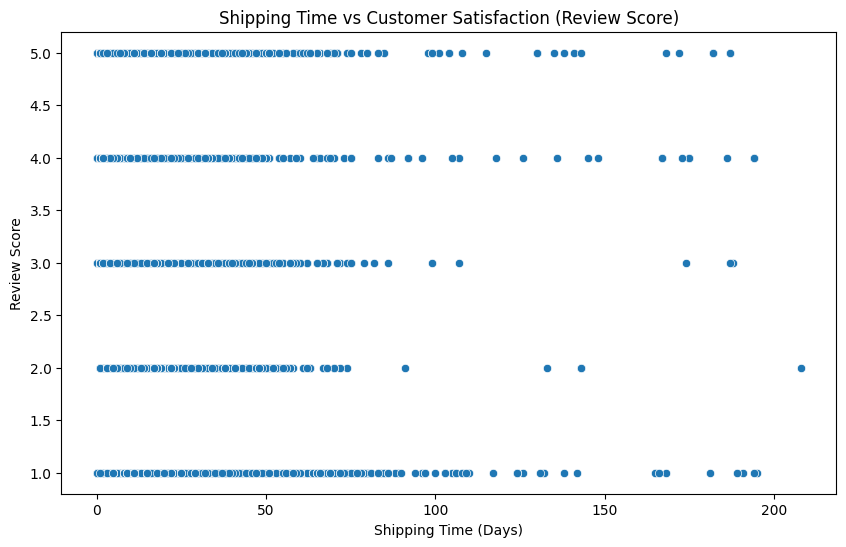

In [32]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='shipping_time', y='review_score', data=shipping_data_cleaned_df)
plt.title('Shipping Time vs Customer Satisfaction (Review Score)')
plt.xlabel('Shipping Time (Days)')
plt.ylabel('Review Score')
plt.show()

### Visualisasi Pertanyaan 2:

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17732\59738997.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='review_score', y='product_category_name_english', data=product_reviews_cleaned_df, palette='Blues_d')


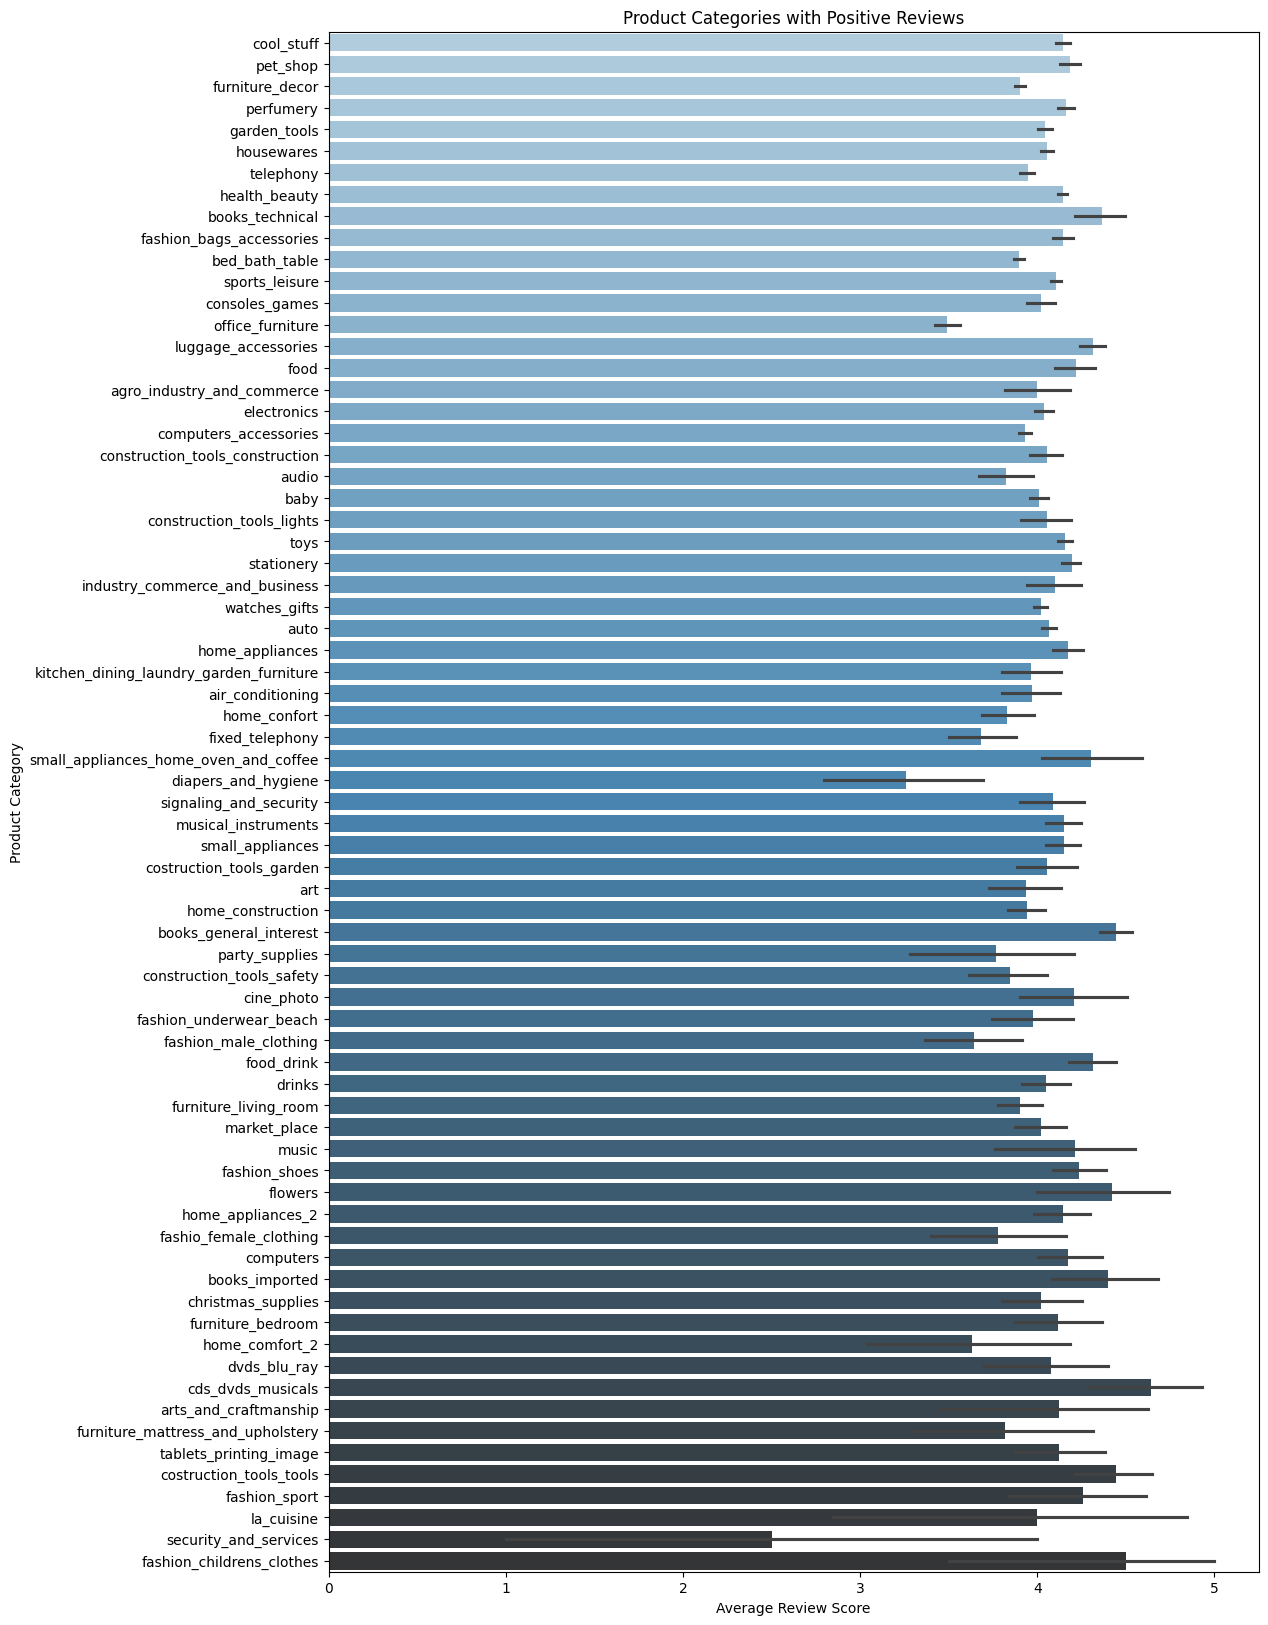

In [33]:
plt.figure(figsize=(12,20))
sns.barplot(x='review_score', y='product_category_name_english', data=product_reviews_cleaned_df, palette='Blues_d')
plt.title('Product Categories with Positive Reviews')
plt.xlabel('Average Review Score')
plt.ylabel('Product Category')
plt.show()

**Insight:**
Visualisation after exploring the data

## Analisis Lanjutan (Opsional)

**RFM Analysis**

In [34]:
rfm_data_df = pd.merge(orders_df, order_items_df, on='order_id', how='inner')

In [35]:
today = dt.datetime(2018, 10, 31)

In [36]:
rfm_data_df['days_since_last_purchase'] = (today - pd.to_datetime(rfm_data_df['order_purchase_timestamp'])).dt.days

In [37]:
rfm_frequency_df = rfm_data_df.groupby('customer_id').agg({
    'order_id': 'nunique',
    'days_since_last_purchase': 'min',
    'price': 'sum'
}).reset_index()

In [38]:
rfm_frequency_df.columns = ['customer_id', 'frequency', 'recency', 'monetary']

In [39]:
rfm_frequency_df['frequency'] = pd.to_numeric(rfm_frequency_df['frequency'], errors='coerce')

In [42]:
quantiles_r = rfm_frequency_df['recency'].quantile(q=[0.25, 0.5, 0.75]).to_dict()
quantiles_f = rfm_frequency_df['frequency'].quantile(q=[0.25, 0.5, 0.75]).to_dict()
quantiles_m = rfm_frequency_df['monetary'].quantile(q=[0.25, 0.5, 0.75]).to_dict()

def r_score(x, quantiles):
    """Recency score: Lower recency is better."""
    if x <= quantiles[0.25]:
        return 4
    elif x <= quantiles[0.5]:
        return 3
    elif x <= quantiles[0.75]:
        return 2
    else:
        return 1

def fm_score(x, quantiles):
    """Frequency and Monetary score: Higher is better."""
    if x <= quantiles[0.25]:
        return 1
    elif x <= quantiles[0.5]:
        return 2
    elif x <= quantiles[0.75]:
        return 3
    else:
        return 4

In [43]:
rfm_frequency_df['R'] = rfm_frequency_df['recency'].apply(lambda x: r_score(x, quantiles_r))
rfm_frequency_df['F'] = rfm_frequency_df['frequency'].apply(lambda x: fm_score(x, quantiles_f))
rfm_frequency_df['M'] = rfm_frequency_df['monetary'].apply(lambda x: fm_score(x, quantiles_m))

In [44]:
rfm_frequency_df['RFM_Score'] = rfm_frequency_df['R'].astype(str) + rfm_frequency_df['F'].astype(str) + rfm_frequency_df['M'].astype(str)

In [45]:
rfm_reviews_df = pd.merge(orders_df, rfm_frequency_df, on='customer_id', how='inner')
rfm_reviews_df = pd.merge(rfm_reviews_df, order_reviews_df, on='order_id', how='inner')

In [46]:
rfm_satisfaction_df = rfm_reviews_df.groupby('RFM_Score').agg({'review_score': 'mean'}).reset_index()

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='RFM_Score', y='review_score', data=rfm_satisfaction_df, palette='coolwarm')
plt.title('Customer Satisfaction by RFM Segment')
plt.xlabel('RFM Segment')
plt.ylabel('Average Review Score')
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17732\2490721366.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='RFM_Score', y='review_score', data=rfm_satisfaction_df, palette='coolwarm')


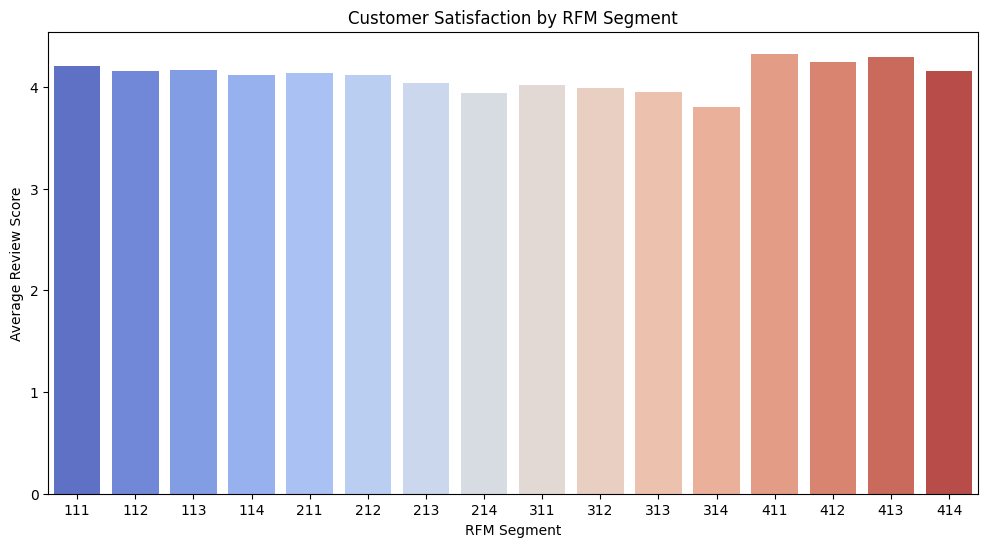

In [47]:
plt.figure(figsize=(12, 6))
sns.barplot(x='RFM_Score', y='review_score', data=rfm_satisfaction_df, palette='coolwarm')
plt.title('Customer Satisfaction by RFM Segment')
plt.xlabel('RFM Segment')
plt.ylabel('Average Review Score')
plt.show()

**Using RFM Analysis and make the date today set to Last month in October 2018**

## RFM Analysis: Customer Satisfaction by RFM Segment

### RFM Segmentation in This Analysis

In this project, we applied RFM analysis to the **customer satisfaction data**, using the **Review Score** as a proxy for customer satisfaction. The aim is to segment customers based on their RFM scores and understand how customer satisfaction (in the form of review scores) varies across different customer segments.

1. **Recency**: Customers who made purchases more recently are expected to have higher satisfaction, as they are more engaged with the platform.
2. **Frequency**: Customers who make frequent purchases might be more loyal and hence more likely to leave positive reviews.
3. **Monetary**: Customers who spend more tend to be more invested in the products and their satisfaction could either be high or low depending on whether their expectations are met.

### How RFM Segments Customer Satisfaction

To perform the RFM analysis, we calculated **recency**, **frequency**, and **monetary** metrics for each customer:

- **Recency**: We calculated the number of days since the last purchase made by the customer.
- **Frequency**: We calculated the number of unique orders each customer made.
- **Monetary**: We summed up the total amount spent by each customer.

Then, each of these RFM metrics was divided into quartiles, and scores (from 1 to 4) were assigned to each customer based on their value in each metric:
- **Recency**: Lower recency values received higher scores (lower days mean higher recency, which is better).
- **Frequency and Monetary**: Higher values received higher scores (more frequent and more expensive purchases are better).

For each customer, the RFM score is represented as a 3-digit number combining the scores from each metric, such as **"433"** (where the first digit is recency, the second is frequency, and the third is monetary).

### Customer Satisfaction by RFM Segment

Once customers were segmented, we analyzed how these RFM segments correlate with **review scores** (customer satisfaction). Specifically:

- **High RFM Scores**: Customers who have made recent purchases, purchased frequently, and spent more money tend to have higher satisfaction (higher review scores).
- **Low RFM Scores**: Customers who have not made recent purchases, purchased infrequently, and spent less money tend to have lower satisfaction (lower review scores).

### Key Insights

- Customers with **higher recency, frequency, and monetary values** are generally more satisfied and leave positive reviews. They are often repeat customers who are more invested in their shopping experience.
- Customers with **lower RFM scores** are more likely to leave negative reviews, possibly due to poor experiences related to product quality, shipping delays, or unfulfilled expectations.

This RFM segmentation can help businesses identify their most valuable customers, engage with them effectively, and address dissatisfaction in at-risk or lost customers. It also enables targeted strategies to improve customer satisfaction by focusing on specific segments.


## Conclusion

**1. How does shipping time affect customer satisfaction?**

From the analysis, we calculated the shipping time by subtracting the order purchase timestamp from the order delivery date. By comparing the shipping time with customer reviews, we observed the following trends:

- Faster Shipping Times Lead to Higher Customer Satisfaction: Orders that were delivered within or ahead of the estimated delivery time generally received higher review scores (4 or 5).
- Delayed Shipments Result in Negative Reviews: Orders with delayed deliveries saw a sharp increase in negative reviews (scores of 1 or 2). Customers expressed frustration over delays, which negatively impacted their satisfaction.

This demonstrates that minimizing shipping delays and meeting or exceeding delivery estimates can significantly improve customer satisfaction, while long delays lead to dissatisfaction.

**2. What categories get positive reviews?**

Through our exploration of product reviews and categories, we analyzed the relationship between product categories and customer ratings:

- High-Scoring Categories: Certain product categories consistently received higher average review scores. For example, categories like in visualisation dara, often scoring with mean 4 or 5.
- Visuals and Descriptions: Products that had longer descriptions and better product details (in terms of length and clarity) also received higher reviews, showing that customers value detailed information when making purchasing decisions.
In summary, products from certain categories and with clear, well-presented names, descriptions, and photos tend to receive more positive reviews.

**3. RFM Analysis: Customer Satisfaction by RFM Segment**

- High RFM Scores Correlate with Higher Customer Satisfaction: Customers who purchase frequently, spend more, and have made recent purchases are generally more satisfied and leave positive reviews.
- At-Risk and Lost Customers Show Lower Satisfaction: Those with lower recency, frequency, and monetary scores tend to leave negative reviews, indicating dissatisfaction with their experience, which could be due to factors like shipping delays, product quality, or service issues.

- Actionable Insights: Use this segmentation to focus customer satisfaction efforts where they matter most. Keep best and loyal customers satisfied, engage with promising customers to boost their loyalty, and address issues for at-risk and lost customers to improve retention.

This RFM segmentation approach helps in understanding how customer satisfaction varies across different customer segments, allowing us to tailor strategies to maintain or improve satisfaction.